<b>INTRODUCTION</b> : 
<br>In this soptlight , I will dicuss SBERT. Sentence-BERT : SBERT produces sentence embeddings (vectors) which could be used to many vector operation to find out relationship between sentence .It fine-tunes  pre- BERT / RoBERTa / DistilBERT / ALBERT / XLNet with a siamese or triplet network structure to produce semantically meaningful sentence embeddings that can be used in unsupervised scenarios: Semantic textual similarity via cosine-similarity, clustering, semantic search.</br>

We will dicuss some other concepts briefly to reach to the SBERT Architecture .I have  tried not to include mathematical formulas in this spotlight to keep it easier to understand . At last I will show SBERT's usage on homework1 data by computing ranking and also clustering the data.



Start with <b> Word Embedding</b> ?

So far in our course we have used tf and idf numbers to represent documents as vectors . Similiarly Word 
embeddings are in fact a class of techniques where individual words are represented as real-valued vectors 
in a predefined vector space. By defined  space means the space of the all of words of a dictionary or words
in a set of document.Each word is represented by a vector such that words with same meaning are close in the vector space . Example word 'Kid' and 'Child' should have similar embedding vectors.
These vectors are trained on a dataset like entire wikepedia, which has millions of word and there are several alogorithm to come up with vector values . 

Once such algorithm is <b>CBOW</b> : CBOW predicts word from the context words. It used 2 layer neural network.I will try  to exaplain it easily using a document example consisting of just 5 words .

<b>Example</b> : Consider this set  "Hope can set you free" . 
        
Initially all 5 words are given one hot vector encoding (1 if word is present and 0 otherwise) of length = 5 . 
In CBOW a window is used ,which is slided over ducument , neural network is used to predict the middle word in the window . For this example consider window of size 3 . 
1st slide will include words "Hope can set " we will try to predict 'can' using words 'Hope' and 'set' . The input to neural net will be hot encoding vectors of 'Hope' and 'Set' and output will be Vector of word 'can' . All vectors are of size 5 . The hidden layer will have 3 nodes and the output is also of size 5 . So we need to learn two matrices of size (3,5) and (5,3) near input and near output layer respectively . 

Sliding window through entire document we will get three different input output pairs. The final (3,5) weight matrix obtained by optimization of loss function is used to get word embedding of a word by multiplying (3,5) matrix with vector of size (1,5) . The final output embedding vector is of size (1,3). i.e. size of window.

I found this video link helpful if want to learn briefly about word embedding  : https://www.youtube.com/watch?v=UqRCEmrv1gQ 



<b>Some Basic NLP networks </b>.

In this spotlight we will briefly discuss networks used on sentences to get inferences . The input to these are word embedding vectors.

<b>Recurrent Neural Network (RNN)</b>:
<br>
Humans don’t start their thinking from scratch every second. As you read this spotlight, you understand each word based on your understanding of previous words.Recurrent neural networks address this issue. They are networks with loops in them, allowing information to persist. In the below  diagram, an recurrent neural network, h, looks at some input xt and outputs a value o. A loop allows information to be passed from one step of the network to the next. The unfolded network is easy to comphrehend. The loop is unfolded into chunk of neural network ht with xt and state of previous neural network as input and Ot as output . We will not go into mathematical equations . RNN can be interpreted as unfolded neural network which has state of previous neural network also as input. 
</br>


To get more info : https://colah.github.io/posts/2015-08-Understanding-LSTMs/



In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/b/b5/Recurrent_neural_network_unfold.svg")

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.amazonaws.com%2F0%2F240801%2F32b78e6a-453d-8080-4a9f-f6d16c172b07.png?ixlib=rb-1.2.2&auto=format&gif-q=60&q=75&s=cede963517d067259342e56e947d934e")

Ubove is a simple example of a sentence .Here to predict the future word after tomato we have used past words or just the left context.Thus Single directional RNN could cover only left or right context of a sentence . 

So need for Bidirectional RNN which is nothing but a two layer RNN. Bidirectional Rnn scans sentence sequentially from both left and right side .


In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.amazonaws.com%2F0%2F240801%2Fddafec92-0232-22b9-46f7-56480caeb49c.png?ixlib=rb-1.2.2&auto=format&gif-q=60&q=75&s=143b093fd408a93d6e3666347ef79bc8")

<b>Cons of RNN network</b> : On modern GPUs and TPUs we can't take advantage of parallelization using RNN network.
Solution is using <b>Attention Layer</b>  .

 <b>Attention Layer</b> : <br>Could be comapared to a database of keys and values . We have a query , the output value is the one whose key has the required relation with the query. It could also be compared with an CNN which uses local attention on a image using a window and extracts multiple features using multiple windows . </br>

A visual representaion on a attention layer is shown below .I could not find any better and simple representation of attention layer online, so hand drawn representation. 

Here keys are word embedding. query could be information need embedding or any other sentence embedding . 


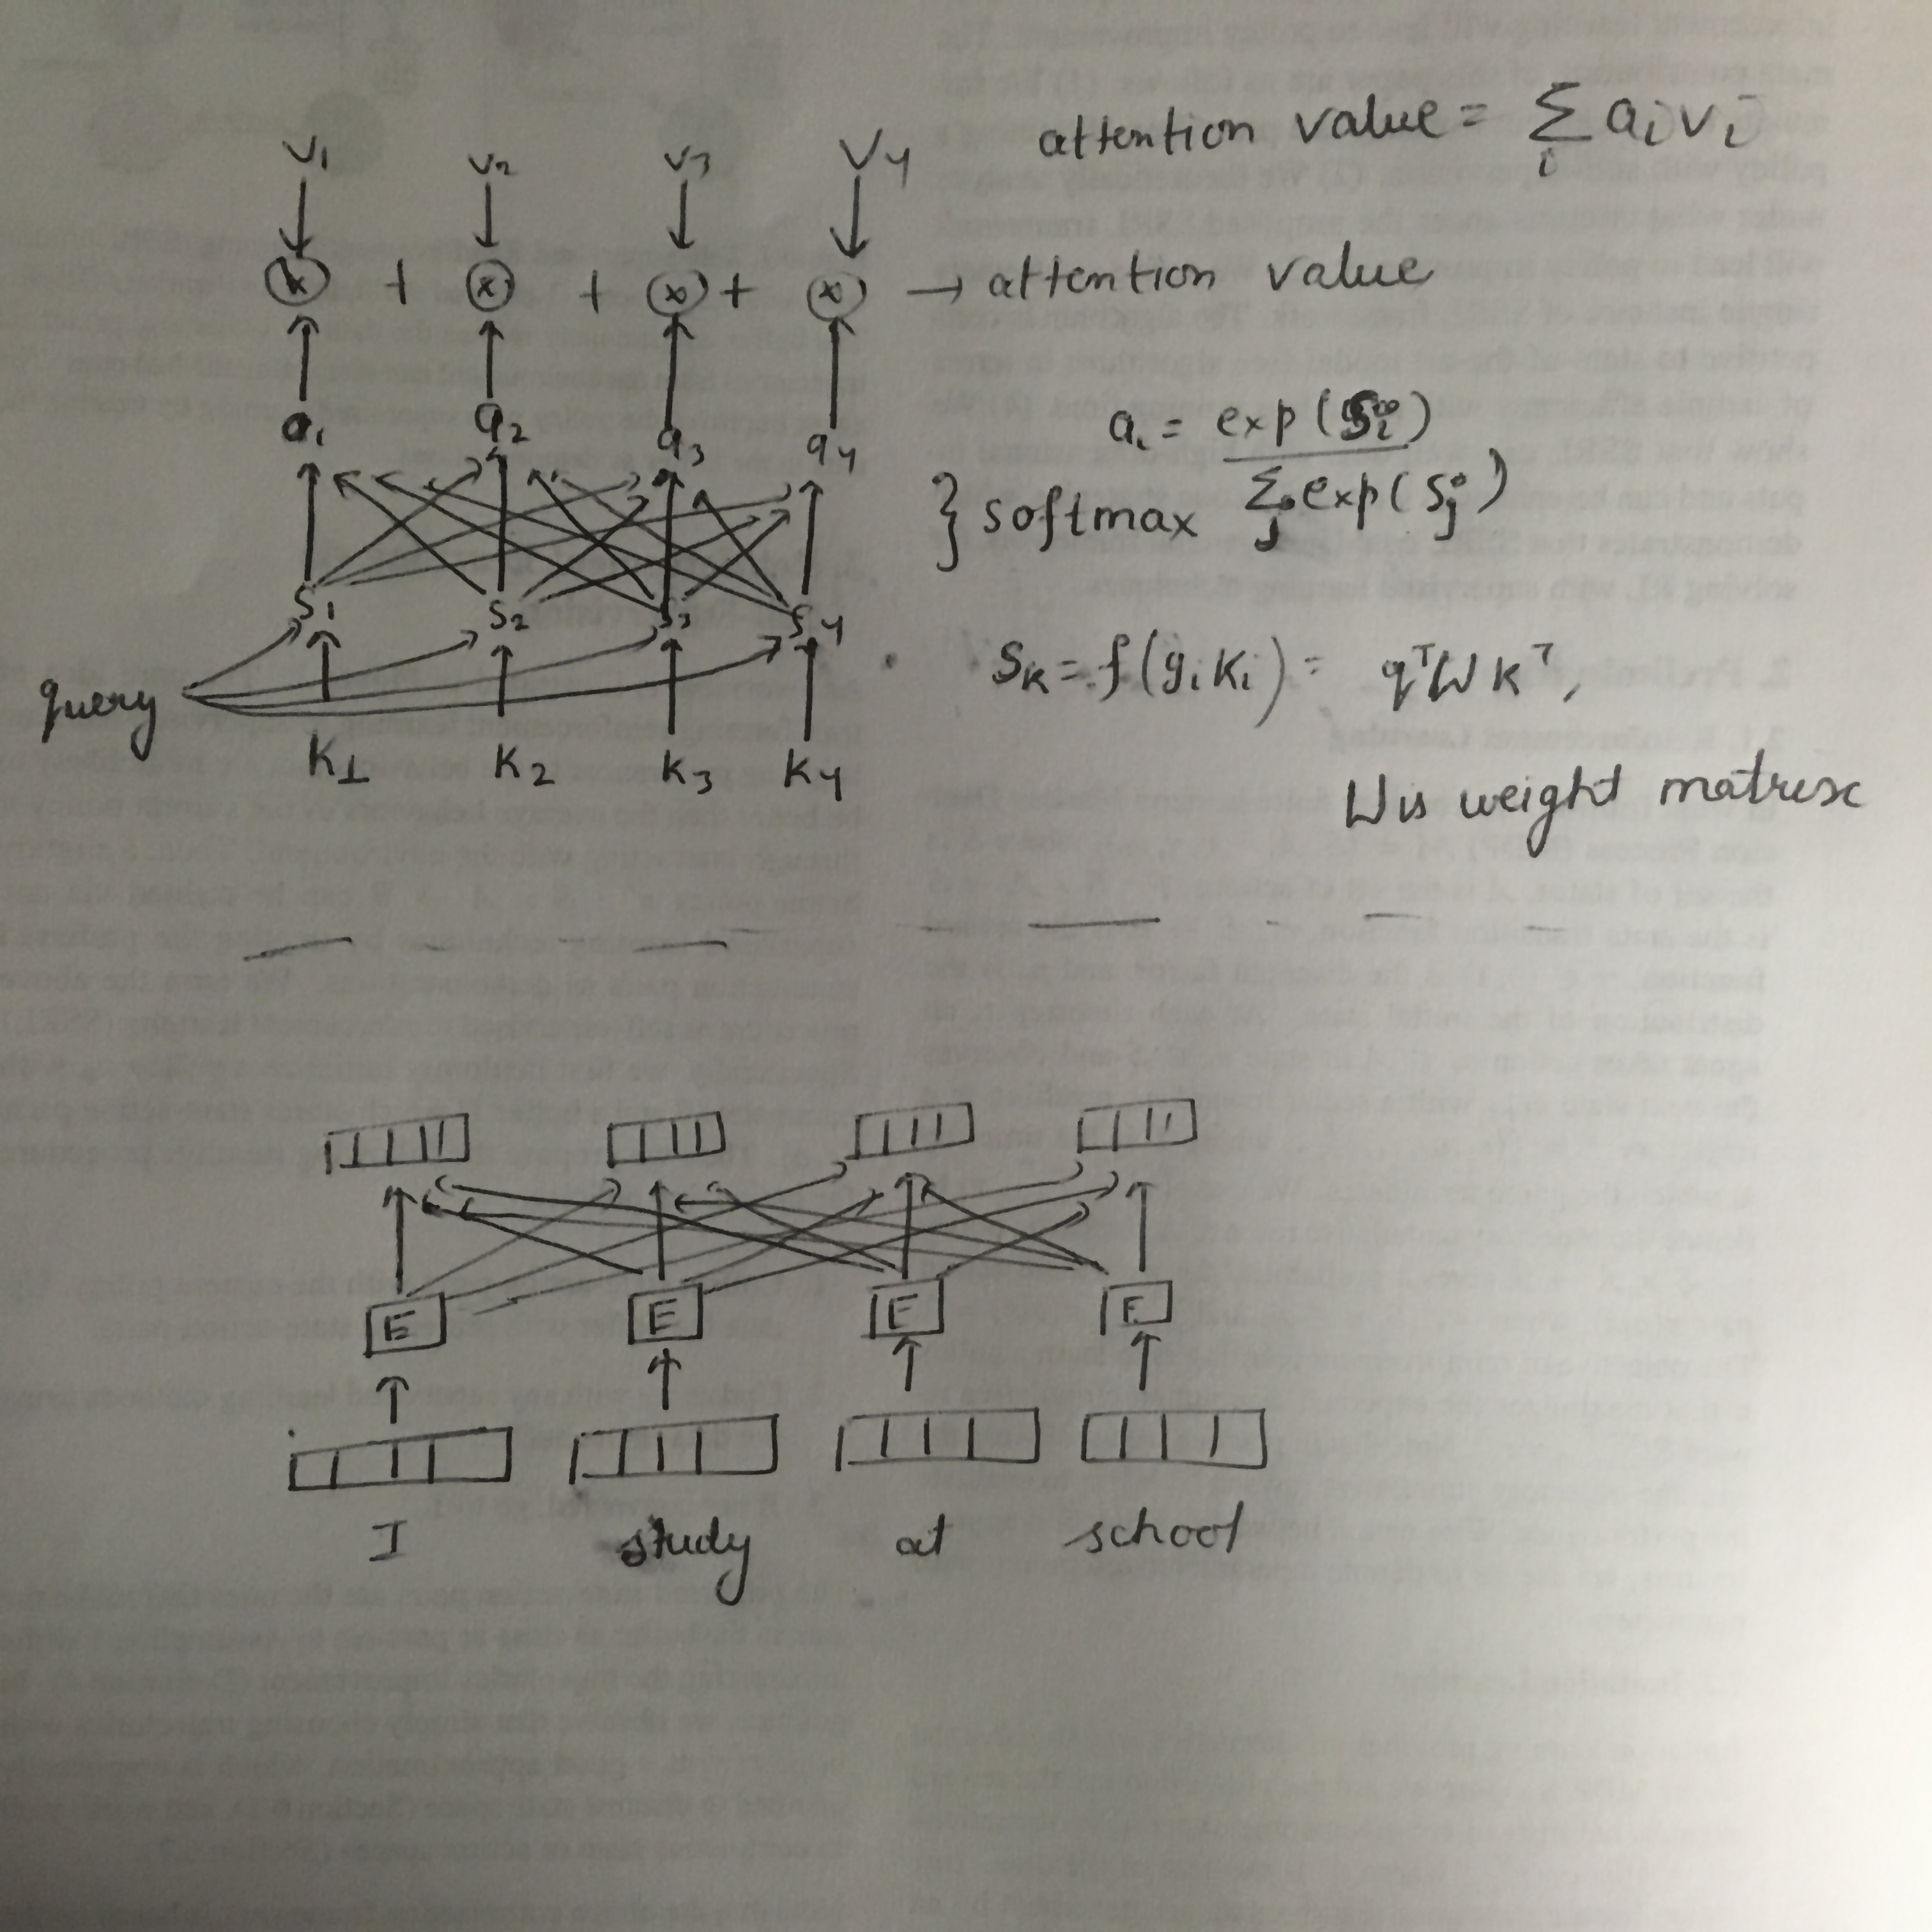

In [9]:
from IPython.display import Image
Image(filename= "/Users/deveshkumar/Downloads/AttentionLayer.jpg")

So,in Scaled Dot-Product Attention" the input consists of queries and keys of dimension dk, and values of dimension dv. We compute the dot products of the query with all keys, divide each by √ dk, and apply a softmax function to obtain the weights on the values. In practice, we compute the attention function on a set of queries simultaneously, packed together into a matrix Q. The keys and values are also packed together into matrices K and V. (No need to get into mathematical equation now just visualization is sufficient )


<b>Multihead Attention</b>:
Multihead Attention are just concatenation of multiple attention layers to extract more features from the input vector like multiple windows used in Convolution Neural Network. Image below shows the same thing . Here depth 'h' is just multiple attention layer used.

Using attention we don't need to parse entire sentence to get a output . It is useful in use cases like translation as in translation , it's better to transalte few words together then the entire sentece rather than reading the whole sentence, memorizing it and then translating it.

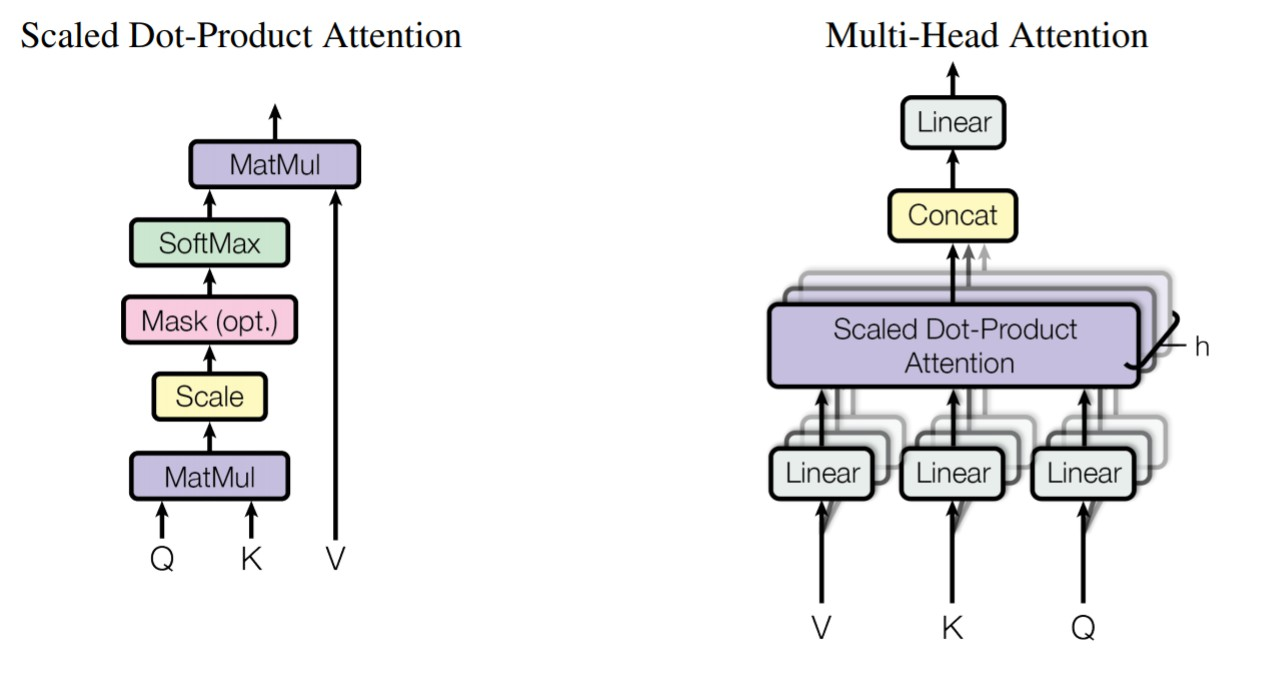

In [10]:
from IPython.display import Image
Image(filename= "/Users/deveshkumar/Downloads/multi_head_attention.jpg")

Now <b>BERT</b> : <br>
Previous language models either sees sentences from left to right or combined left - right and right -left. BERT, which stands for Bidirectional Encoder Representations from Transformers is designed to pretrain deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. 
Transformers encoder (encode word embedding vectors  to vectors)uses multihead attention layers in sequence . 1st layer considers pairs of words  , second layer considers pair of pairs of words and so on .

As a result, the pre-trained BERT model can be fine tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial taskspecific architecture modifications.

BERT  has multiple attention mechanisms(layers), called heads, which operate in parallel to one another.Multi-head attention enables the model to capture a broader range of relationships between words than would be possible with a single attention mechanism. 
BERT also stacks multiple heads, each of which operates on the output of the layer that came before. Through this repeated composition of word embeddings, BERT is able to form very rich representations as it gets to the deepest layers of the model.

<b>Types of BERT Layers :</b>
<br>1.BERT-Base, Uncased : 12-layer, 768-hidden, 12-heads, 110M parameters. 
<br>2.BERT-Large, Uncased : 24-layer, 1024-hidden, 16-heads, 340M parameters. 
<br>3.BERT-Base, Cased : 12-layer, 768-hidden, 12-heads , 110M parameters. 
<br>4.BERT-Large, Cased : 24-layer, 1024-hidden, 16-heads, 340M parameters

Where heads are number of attention layers used . Cased and Uncased refers to upper lower case of words

In figure shown below look closely to the hidden attention layers.







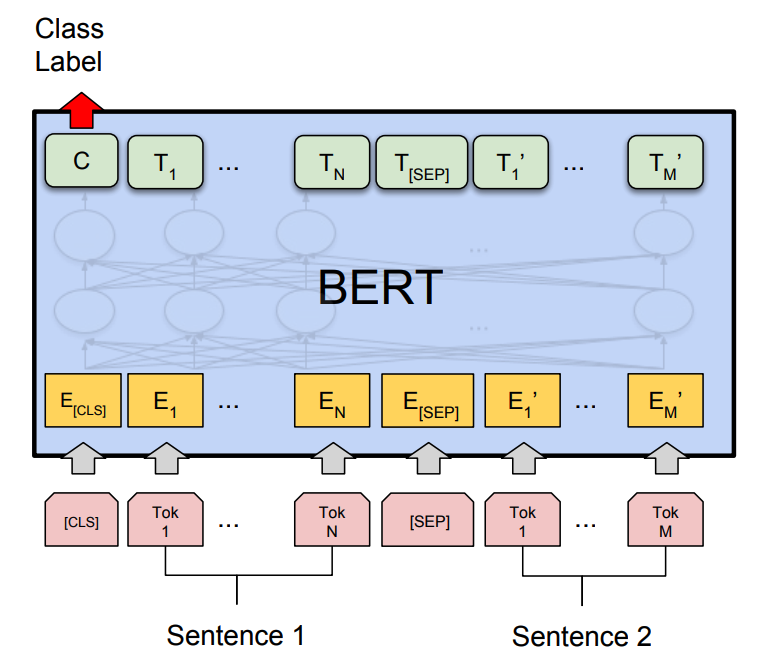

In [11]:
from IPython.display import Image
Image(filename= "/Users/deveshkumar/Downloads/bert-sentence-pair.png")

**In bert the embedding vector consist of three vector .1st one is the token of words. 2nd one is to restore respective postion of each word in sentence and 3rd one is to the sentece to which the token belongs to . This preserves the permutaion of words given in input .More clear in the picture below.

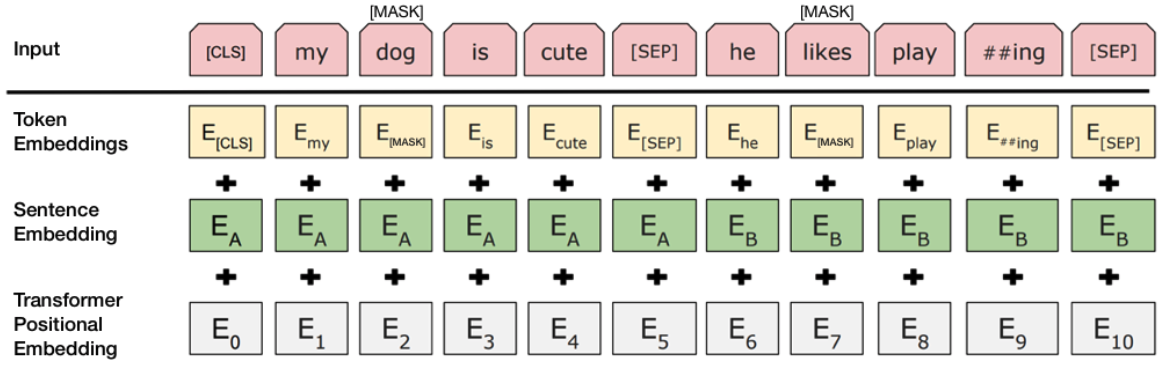

In [12]:

from IPython.display import Image
Image(filename= "/Users/deveshkumar/Downloads/BertEmbedding.png")

<b>Finally Sentence-BERT </b>: 
SBERT produces sentence embeddings (vectors)  which could be used to many vector operation to find out relationship between sentence .It fine-tunes (slightly changing weights matrix of pre trained network ) pre- BERT / RoBERTa / DistilBERT / ALBERT / XLNet with a siamese or triplet network structure (Siamese is just layer of weight matrixs whose input is a vector and output is also a vector and triplet is kind of loss function which considers relationship between two input vector and two output vectors) to produce semantically meaningful sentence embeddings that can be used in unsupervised scenarios: Semantic textual similarity via cosine-similarity, clustering, semantic search.  

Simple Sbert architecture for sentence embedding is shown below .

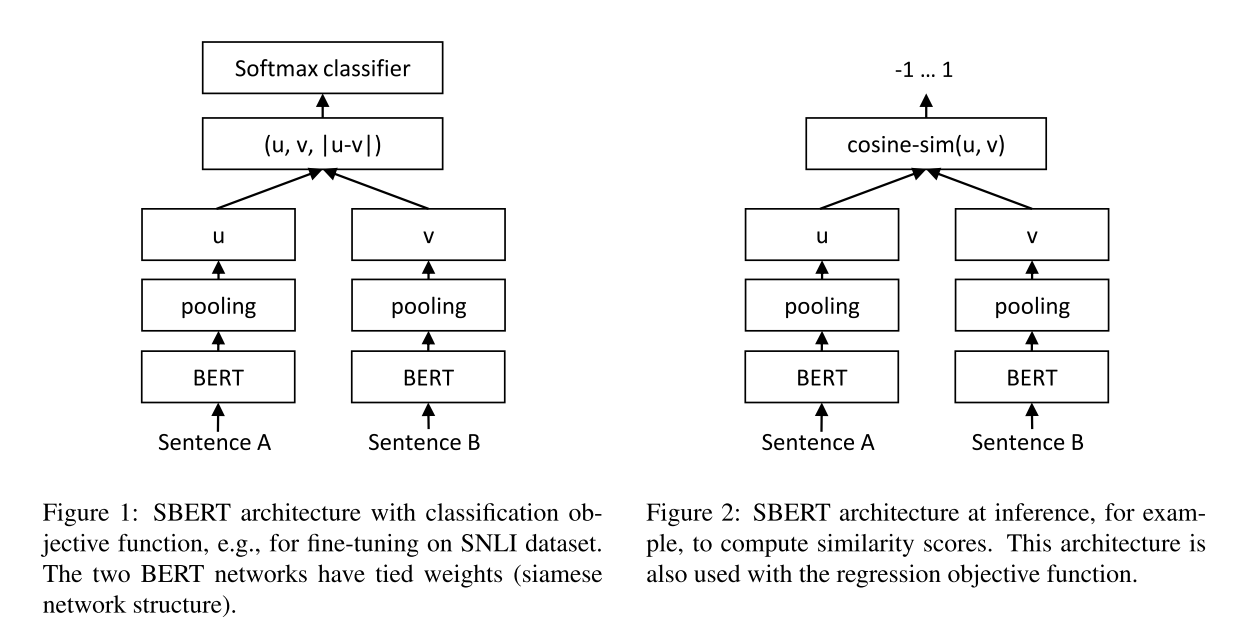

In [15]:

from IPython.display import Image
Image(filename= "/Users/deveshkumar/Downloads/SBERT.png")

About the picture above : This model consist of a bert based uncased layer and a poolling layer above it. The model can then be trained on a dataset and evaluated on an unseen dataset . using various loss function like cosine similiarity .



In this Spotlight I will discuss <b>UKLAB SBERT </b>library usage .

<b>Setup</b>:
 Make sure to have Python 3.6 or higher. The model is implemented with PyTorch (at least 1.0.1) using     transformers v2.3.0. The code does not work with Python 2.7. All of us have python 3.6 or higher .
Using PIP:

pip install -U sentence-transformers



In [14]:
pip install -U sentence-transformers


Requirement already up-to-date: sentence-transformers in /opt/anaconda3/envs/cs670/lib/python3.7/site-packages (0.2.5)
Note: you may need to restart the kernel to use updated packages.


I will start with simple example to produce sentence embeddings using SBERT pretrained models . In this example <b>'bert-base-nli-mean-tokens'</b> model is used  which uses bert base layer trained on NLI data and pooling layer is mean pooling

In [20]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [21]:
sentences = ['This is information retrieval course.',
    'Dr James is the instructor for this course.' 
    'This is a spotlight notebook.']
sentence_embeddings = model.encode(sentences)

In [24]:
#Now print the embedding vectors
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This is information retrieval course.
Embedding: [-6.04652405e-01 -3.57214272e-01  2.42686820e+00  6.93059504e-01
  9.02240932e-01 -3.74361068e-01 -8.43924701e-01  1.22143006e+00
  3.39819610e-01  6.25641420e-02 -2.50883788e-01  8.70633900e-01
  3.60988766e-01  1.03416286e-01  4.67268378e-01 -1.13684580e-01
 -8.49695086e-01 -3.75162750e-01  6.66562915e-01 -5.94846308e-01
 -1.42669767e-01  4.07328814e-01 -7.06506073e-01 -3.42277825e-01
  3.81236970e-01  1.29198916e-02 -1.39201045e-01 -9.73579407e-01
 -1.25358284e-01  1.12705305e-01 -4.74858806e-02 -9.42442358e-01
  6.43903852e-01  6.09881878e-02 -1.97191700e-01  5.97988784e-01
  4.17136177e-02  4.86684591e-01 -1.90454349e-01  1.33579254e-01
  1.57410935e-01  6.65982127e-01  8.20548296e-01  7.54169226e-01
 -1.26400709e+00 -7.09191978e-01 -6.40001535e-01  1.50283813e-01
 -2.28847459e-01 -7.18846440e-01 -1.15133071e+00 -1.46348163e-01
 -1.85230434e-01  4.29996252e-01 -8.45248222e-01  1.05102789e+00
  5.64923584e-01 -1.65275562e+0

The SBERT can be used to fine tune pretrained models using task specific dataset or entire network can be trained from scratch . Not covered in this spotlight as tough to train entire network with the resources and data available.


So, I will use pre trained models and find cosine similiarity between data of Home work 1 . I will also show the clustering application of it.

In [18]:
##preparing data in this cell
#docIdQueryDict: A dict object of docId and Entity
#docIdDefinationDict:A dict of docId and defination
#Use homework dataset to find similiarity between documents definations 

docIdQueryDict ={}       # two diff dictionary to store data
docIdDefinationDict = {}
with open("homework_1_data.txt","r") as dataFile:
    dataFileLines = dataFile.readlines()

    for line in dataFileLines:
        lineElements = line.split('\t') 
        docIdQueryDict[lineElements[1]] = lineElements[0]
        docIdDefinationDict[lineElements[1]] = lineElements[2]




In [22]:
##our corpus is 100 documents of homwwork data set . 
#we will rank documents using SBERT similiarity
embedder = SentenceTransformer('bert-base-nli-mean-tokens')
corpus = list(docIdDefinationDict.values())

corpus_embeddings = embedder.encode(corpus)  # sentence embedding vector of all document definations


In [23]:
#find queries embedding
queries  = ['relational database','garbage collection','retrieval model']
query_embeddings = embedder.encode(queries)  # embedding vectors of queries

In [25]:
#calculate score and store in result dict
import scipy
result={}
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0] # cosine similiarity
    perQueryData = {}
    for iter  in range(len(distances)):
        score = 1- distances[iter]
        perQueryData[corpus[iter]] = score
        
    perQueryData = {k: v for k, v in sorted(perQueryData.items(), key=lambda item: item[1],reverse=True)}
    result[query] = perQueryData   # final data structure to store document scorre query wise

In [28]:
#Top 5 document definations
total  = 5

for key in result.keys():
    i = 1
    print("Query:",key)
    for subkey in result[key].keys():
        if(i>5):
            break
        
        print(i)
        i=i+1
        docId = list(docIdDefinationDict.keys())[list(docIdDefinationDict.values()).index(subkey)]
        docEntity = docIdQueryDict[docId]
        print("Doc Id:",docId)
        print("Doc Entity:",docEntity)
        print("DocumentDefination:",subkey)
        print("score",result[key][subkey])
        

Query: relational database
1
Doc Id: 28177
Doc Entity: relational database
DocumentDefination: relational database schema with data

score 0.9476765367498795
2
Doc Id: 28227
Doc Entity: relational database
DocumentDefination: a database using the relational data model.

score 0.9334739124128145
3
Doc Id: 28205
Doc Entity: relational database
DocumentDefination: a database built using the relational database model

score 0.9116557291479003
4
Doc Id: 28376
Doc Entity: relational database
DocumentDefination: a database built using the relational data model

score 0.9101488411234845
5
Doc Id: 28170
Doc Entity: relational database
DocumentDefination: a set of tables, database using relational databse model

score 0.9010058968832307
Query: garbage collection
1
Doc Id: 4150
Doc Entity: garbage collector
DocumentDefination: the part of the operating system that performs garbage collection.

score 0.7941860886122224
2
Doc Id: 6319
Doc Entity: direct manipulation
DocumentDefination: using metaph

In [29]:
#Here for demo we are using k-means clustering with only 20 clusters
from sklearn.cluster import KMeans

num_clusters = 20
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

corpus_cluster= {}                 #preparing dict of doc defination and it's cluster value
for i in range(len(cluster_assignment)):
    corpus_cluster[corpus[i]] = cluster_assignment[i]



In [30]:
#print docId belonging to any cluster , let it be cluster 1
for key in list(corpus_cluster.keys()):
    if corpus_cluster[key] == 1:
        defination = key
        docId = list(docIdDefinationDict.keys())[list(docIdDefinationDict.values()).index(key)]
        docEntity = docIdQueryDict[docId]
        print("Doc Id:",docId)
        print("Doc Entity:",docEntity)
        print("DocDefination:",defination)
        
# Shown only a example cluster . We can use any clustering algorithm on these embedding .
#output is document belonging to one cluster.

Doc Id: 34
Doc Entity: systems design
DocDefination: describes how the system will resolve the business problem; deliverable = technical system specifications

Doc Id: 48
Doc Entity: systems design
DocDefination: describes how the new system will resolve the business problem  -designing the human interface  -designing databases

Doc Id: 60
Doc Entity: systems design
DocDefination: describes how the system will resolve the business problem

Doc Id: 62
Doc Entity: systems design
DocDefination: the specification of a detailed computer-based solution.   also called physical design. •systems analysis emphasizes the business problem

Doc Id: 251
Doc Entity: requirements specification
DocDefination: eliciting information about the work domain from the customer

Doc Id: 280
Doc Entity: product line
DocDefination: - created by companies as a marketing strategy to capture sales of consumers already buying the brand.

Doc Id: 295
Doc Entity: product line
DocDefination: a group of products that ar

Doc Id: 2409
Doc Entity: electronic commerce
DocDefination: what is the term for the integration of communications, data management and security capabilities designed to allow organizations and consumers to exchange information about the sale of goods and services?

Doc Id: 2506
Doc Entity: security policies
DocDefination: with regards to technology, , a security policy defines an agree- ment between a corporation or the technology provider and the technology user.

Doc Id: 2507
Doc Entity: security policies
DocDefination: the purpose of a security policy is to protect the assets of an organization.   assets also entails things such as intellectual property, processes and procedures, sensitive customer data, and specific server functions.

Doc Id: 2508
Doc Entity: security policies
DocDefination: senior management creates company-wide policies. such as what sensitive data will be stored, how data will be processed, how can employees obtain copies of data. senior management must establi


Doc Id: 3977
Doc Entity: business rules
DocDefination: guidelines used in day-to-day operations. defined by you to comply with your organization's policies and procedures.

Doc Id: 3979
Doc Entity: business rules
DocDefination: can be used to define or constrain some aspect of a business's structure or processes  database systems should support business rules that are relevant to the specific functions supported by the system

Doc Id: 3980
Doc Entity: business rules
DocDefination: decision logic in policies, procedures, requirements and conditional statements that govern how business systems work; e.g., rules about compensation levels for various insurance coverages.

Doc Id: 3982
Doc Entity: business rules
DocDefination: how a system handles data and produces useful information. business rules, also called business logic, reflect the operational requirements of the business. examples include adding the proper amount of sales tax to invoices, calculating customer balances and finance 

Doc Id: 4488
Doc Entity: data warehouse
DocDefination: a logical collection of information- gathered from many databases- that supports business analysis activities and decision-making tasks

Doc Id: 4489
Doc Entity: data warehouse
DocDefination: a logical collection of information - gathered from many different operational databases - that supports business analysis activities and decision-making tasks  primary purpose is to aggregate information throughout an organization into a single repository for decision-making purposes

Doc Id: 4491
Doc Entity: data warehouse
DocDefination: is the primary source of information that feeds the analytical processing within an organization.

Doc Id: 4497
Doc Entity: data warehouse
DocDefination: collect data from various operational databases. provide users with historical data to find patters and trends in support of decision making. most likely used for business analytics for decision modeling and predictive and optimization models.

Doc Id: 4498

Doc Entity: conceptual framework
DocDefination: establishes the concepts that underlie financial reporting, a coherent system of concepts that flows from an objective

Doc Id: 6595
Doc Entity: conceptual framework
DocDefination: a basis for setting accounting rules and for resolving financial reporting controversies

Doc Id: 6776
Doc Entity: user experience
DocDefination: designing interactive products to support the way people communicate and interact in their everyday and working lives (sharp, rogers and preece, 2007)  focuses on interaction of people and products the design of spaces for human communication and interaction (winograd, 1997)  refers to space in the human point of view, rather than architectural point of view  how a product behaves  how a product is used by people in the real world  one cannot design a user experience, only design for a user experience

Doc Id: 6795
Doc Entity: user experience
DocDefination: encompasses all aspect's of end-users' interaction with the c

Doc Id: 9708
Doc Entity: data mining
DocDefination: the process of searching for valuable business info. in a large database, warehouse, or mart.

Doc Id: 9710
Doc Entity: data mining
DocDefination: process of digging through huge amount of data and analysing it for extracting the useful meaning of data analyse the pattern of customers and oredict behaviours and future trends which allow organisations to make practical, knowledge driven decisions used to answer business questions

Doc Id: 9726
Doc Entity: data mining
DocDefination: the process of analyzing databases for &"gems&" that will be useful in management decision making  -typically used to refer to the process of combing through massive amounts of customer data at the right time for the right business problem

Doc Id: 9734
Doc Entity: data mining
DocDefination: the techniques utilized to analyze these huge data sets are known as data mining. (especially as used by corporations) in an academic context these same techniques are r

DocDefination: the acquiring and managing of information within an organization and the sharing of that information with its stakeholders.

Doc Id: 10454
Doc Entity: information management
DocDefination: - the process of accessing, processing, maintaining, evaluating, and disseminating knowledge, facts, or data for the purpose of assisting business decision making. - links pieces in an organization together, helps us connect with customers and suppliers, making better decisions

Doc Id: 10459
Doc Entity: information management
DocDefination: the acquiring and overseeing of information within an organization and the sharing of that information with its stakeholders.

Doc Id: 10463
Doc Entity: information management
DocDefination: using technology to access and exchange information to complete the work of an organization

Doc Id: 10477
Doc Entity: information management
DocDefination: facilities, processes, and procedures used to collect, store, and distribute information between produce

Doc Entity: intrusion detection
DocDefination: - can be manual (review of logs), automated, or a combination. - closely related to monitoring. --&gt;workplace monitoring used to ---+ensure quality ---+assess performance ---+comply with regulations (e.g. ensure stockbrokers aren't using high-pressure tactics in violation of stock exchange rules)

Doc Id: 13968
Doc Entity: job scheduling
DocDefination: allows the operating system to allocate system resources to different tasks. the system then attempts to complete jobs and tasks that are prioritized in a job queue. the operating system determines which job will be processed and completed based on the amount of time it takes to process and complete that particular job. scheduling the jobs and tasks in this manner alessia bridging system to ensure that the task are completed on time

Doc Id: 13981
Doc Entity: data aggregation
DocDefination: • customer zone - grid network or clustering technique • product groups - distribution pattern (pick

DocDefination: order entry - order processing system - sales data - decision support system inventory data - inventory tracking system -manufacturing data - decision support system- managerial reports shipping data - distribution system -transportation data - decision support system

Doc Id: 17608
Doc Entity: decision support systems
DocDefination: a specialized information system designed to expedite the decision-making process in businesses.

Doc Id: 17612
Doc Entity: decision support systems
DocDefination: computer based it system that provides interactive support to managers during the decision making process

Doc Id: 17613
Doc Entity: decision support systems
DocDefination: business intelligence systems that combine models and data in an attempt to solve semistructured and some unstructured problems with extensive user involvement.

Doc Id: 17620
Doc Entity: decision support systems
DocDefination: an interactive, flexible, computerized information system that enables managers to o

Doc Id: 23777
Doc Entity: search engine
DocDefination: locate product, business and services

Doc Id: 24020
Doc Entity: business process
DocDefination: the set of connected activities linked with each other for the purpose of achieving one or more business objectives.

Doc Id: 24026
Doc Entity: business process
DocDefination: -centered around outcomes, not people -network of activities for accomplishing a business function -such as: buying and managing inventory, making sales to customers, paying bills, collecting revenue, and hundreds of other business functions

Doc Id: 24028
Doc Entity: business process
DocDefination: way a company is organized to produce goods and services

Doc Id: 24034
Doc Entity: business process
DocDefination: thinking about the type of &"business process,&" such as a b2b procurement application, invoice handling process, logistics process, or salary administration

Doc Id: 24041
Doc Entity: business process
DocDefination: a network of activities for accomplish

Doc Entity: business intelligence
DocDefination: comprehensive, cohesive, integrated set of tools and processes, generate and present information to support business decision making

Doc Id: 25838
Doc Entity: business intelligence
DocDefination: a comprehensive approach to capture and process business data with the purpose of generating information to support business decision making

Doc Id: 25840
Doc Entity: business intelligence
DocDefination: the use of information systems to gather and analyze information from internal and external sources in order to make better business decisions.

Doc Id: 25843
Doc Entity: business intelligence
DocDefination: provides a framework for analyzing decision support data and presenting generated information to end users to support business decisions

Doc Id: 25845
Doc Entity: business intelligence
DocDefination: captures and processes business data to generate information that supports decision making.

Doc Id: 25846
Doc Entity: business intelligence

Doc Id: 26091
Doc Entity: end users
DocDefination: the people whose jobs require access to the database for querying, updating, and generating reports.

Doc Id: 26095
Doc Entity: end users
DocDefination: people whose job require access to the database for querying, updating and generating reports - database is primarily for their use

Doc Id: 26098
Doc Entity: end users
DocDefination: people using a database to support their work or life related tasks and processes

Doc Id: 26108
Doc Entity: end users
DocDefination: the clients of the database as it serves their information needs

Doc Id: 26114
Doc Entity: end users
DocDefination: -clients, customers and business staff which utilize the databases  -involved in planning, gathering requirements and testing

Doc Id: 26115
Doc Entity: end users
DocDefination: managers and supervisors

Doc Id: 26116
Doc Entity: end users
DocDefination: people who use the computer system. they are usually employees or customers.

Doc Id: 26135
Doc Entity: sy

<b>Summary</b>:<br>
    1.Word embedding simple Explaination
   <br> 2.RNN simple explaination
    <br>3.Papers "Attention is all you need " , " BERT: Pre-training of Deep Bidirectional Transformers for Language        Understanding  and SBERT simple explaination.
   <br> 4. Used SBERT on Homework 1 dataset .

<b>Refrences </b>:<br>
1.Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks  https://arxiv.org/abs/1908.10084

2.Attention Is All You Need  https://arxiv.org/abs/1706.03762

3.BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding ,https://arxiv.org/abs/1810.04805

<br>4. UKPLab/sentence-transformers , https://github.com/UKPLab/sentence-transformers#Training

 
